### Background:

Customer churn is defined as the number of customers who have stopped doing business with a company during a given time period. Churn poses a problem for a business as it lowers revenues and profits. Moreover, attracting new customers costs 5 to 25 times more expensive than retaining existing ones. According to Bain & Co., increasing customer retention by 5% will increase profits to more than 25%.

Accurately predicting churn and identifying the relevant factors can help a company develop effective customer retention strategies which, in turn, reduce churn.

### Telco customer churn

The "Telco customer churn" data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Load the data

In [106]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.sample(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3598,6185-TASNN,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,46.30,46.3,No
5279,0394-YONDK,Male,0,Yes,Yes,70,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.15,1790.15,No
3029,1208-DNHLN,Male,0,Yes,Yes,23,Yes,Yes,DSL,No,...,No,No,No,No,One year,Yes,Credit card (automatic),48.35,1067.15,Yes
4861,6941-KXRRV,Female,1,Yes,No,48,Yes,No,DSL,No,...,No,No,No,Yes,One year,Yes,Bank transfer (automatic),58.95,2789.7,No
67,3410-YOQBQ,Female,0,No,No,31,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,79.20,2497.2,No
5718,9840-DVNDC,Male,0,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),80.50,463.05,Yes


In [107]:
df.shape

(7043, 21)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 7043 observations in the data frame, each representing a unique customer.

### CustomerID column is droped as there is no use for training the model

In [109]:
df.drop('customerID', axis ='columns',inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Apparently, there are no missing values. But there is an error:‘Total Charges’ should be numeric. "pd.to_numeric" is used to convert it into Numeric.

In [111]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [112]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

After changing a column from string to numeric, some values may not be recognized, resulting in missing values. Let’s check if there is any missing vaue.

In [113]:
df['TotalCharges'].isnull().sum()

11

Now there are 11 missing values, This indicate that there were no charges for that customer up to the point when the data was obtained. The feature 'tenure' indicates for how long someone has been a customer. Let's check the number of samples with value '0' on that feature and, in case we also find 11 customers, compare if their index match those from the 'missing' values.

In [114]:
#Checking how many number of samples with value '0' on that feature
df['tenure'].isin([0]).sum()

11

In [115]:
# Compare the index match those from the 'missing' values.
print(df[df['tenure'].isin([0])].index)
print(df[df['TotalCharges'].isna()].index)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


Index Number is matching. After confirming our suspects, we can replace those missing values with '0'.

In [116]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].isnull().sum()

0

In [117]:
df.duplicated().sum()

22

In [118]:
df.loc[df.duplicated(), :]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [119]:
df.drop_duplicates(inplace=True)

In [120]:
df.shape

(7021, 20)

In [121]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Dataset has 3 continuos columns and rest of them are categorical columns.

In [122]:
for col in df.select_dtypes('object').columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

gender 

Male      3541
Female    3480
Name: gender, dtype: int64 

Partner 

No     3619
Yes    3402
Name: Partner, dtype: int64 

Dependents 

No     4911
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 

Yes    6339
No      682
Name: PhoneService, dtype: int64 

MultipleLines 

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64 

DeviceProtection 

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64 

TechSupport 

No                     3465
Yes                    20

In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.00,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2286.765026,2266.855057,0.00,403.35,1400.55,3801.7,8684.80


In [124]:
df.describe(include='O') 

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3541,3619,4911,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,5164


In [125]:
df.skew()

SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.959910
dtype: float64

Separating categorical and continuous features to find out any Outliers presented in continuous data (using unique values in dataset).

In [126]:
cat=[i for i in df.columns if df[i].nunique()<10 ]
cont=[i for i in df.columns if df[i].nunique()>10]

In [127]:
print(*cont, sep = "\n")

tenure
MonthlyCharges
TotalCharges


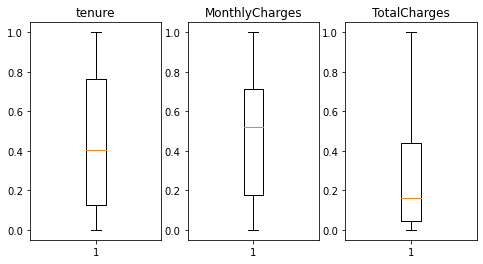

In [212]:
plt.figure(figsize = (8,4))
count = 1
for i in cont:
    plt.subplot(1,len(cont),count) #1-row,len(cont)-column,count-subplot count
    plt.boxplot(df[i])
    plt.title(i)
    count +=1
        
plt.show()

There are no outliers in the above continuous data.

### Encoding Object type Columns

In [130]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
o=OrdinalEncoder()
l=LabelEncoder()

In [131]:
#using Ordinal encoder for independent features
for i in df.columns:
    if df[i].dtypes=='O' and i!='Churn':
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))

#Using Label encoder for Label Column
df['Churn']=l.fit_transform(df['Churn'])

In [132]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2170,0.0,0,0.0,0.0,21,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,60.25,1258.35,0
1476,1.0,0,0.0,0.0,2,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,20.25,36.80,0
4308,1.0,0,0.0,0.0,25,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,69.75,1729.35,0
2995,0.0,0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.25,25.25,0
5292,1.0,0,0.0,0.0,46,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,33.70,1537.85,0


In [133]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [0. 1.]
SeniorCitizen: [0 1]
Partner: [1. 0.]
Dependents: [0. 1.]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0. 1.]
MultipleLines: [1. 0. 2.]
InternetService: [0. 1. 2.]
OnlineSecurity: [0. 2. 1.]
OnlineBackup: [2. 0. 1.]
DeviceProtection: [0. 2. 1.]
TechSupport: [0. 2. 1.]
StreamingTV: [0. 2. 1.]
StreamingMovies: [0. 2. 1.]
Contract: [0. 1. 2.]
PaperlessBilling: [1. 0.]
PaymentMethod: [2. 3. 0. 1.]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [134]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   float64
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   float64
 3   Dependents        7021 non-null   float64
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   float64
 6   MultipleLines     7021 non-null   float64
 7   InternetService   7021 non-null   float64
 8   OnlineSecurity    7021 non-null   float64
 9   OnlineBackup      7021 non-null   float64
 10  DeviceProtection  7021 non-null   float64
 11  TechSupport       7021 non-null   float64
 12  StreamingTV       7021 non-null   float64
 13  StreamingMovies   7021 non-null   float64
 14  Contract          7021 non-null   float64
 15  PaperlessBilling  7021 non-null   float64
 16  PaymentMethod     7021 non-null   float64


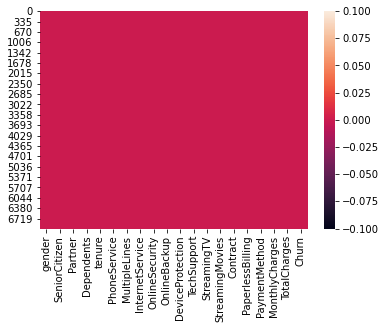

In [136]:
sns.heatmap(df.isnull())

There are no outliers or missing value in our dataset therefore we proceed further.

### Feature Scaling

In [137]:
# Scaling the Dataset

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [138]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [0. 1.]
SeniorCitizen: [0 1]
Partner: [1. 0.]
Dependents: [0. 1.]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0. 1.]
MultipleLines: [1. 0. 2.]
InternetService: [0. 1. 2.]
OnlineSecurity: [0. 2. 1.]
OnlineBacku

### Seperating Features (X) and Target (y)

In [139]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

### Handling Imbalanced Dataset

0    5164
1    1857
Name: Churn, dtype: int64

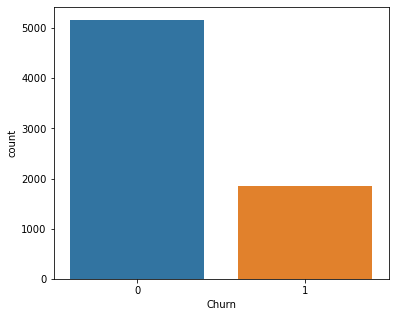

In [140]:
plt.figure(figsize=(6,5))
sns.countplot(x='Churn',data=df)
y.value_counts()

Our target in this prediction is whether or not a customer will churn, represented by the column Churn Label. Looking at the proportion of class labels in said column, however, we see an imbalance. There is an unequal distribution between Churn Label = Yes and Churn Label = No. A majority of the churn data are labeled No while this case places more importance on predicting the Yes.



SMOTE method is chosen to address class imbalance

In [141]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
X,y=over.fit_resample(X,y)
y.value_counts()

1    5164
0    5164
Name: Churn, dtype: int64

### Train - Test Split

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [143]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8262, 19)
(2066, 19)
(8262,)
(2066,)


In [144]:
y_train.value_counts()

0    4159
1    4103
Name: Churn, dtype: int64

In [145]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
258,0.000000,0,1.000000,0.000000,0.027778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.262189,0.009275
6212,1.000000,0,0.000000,0.000000,0.902778,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.000000,0.074627,0.190534
7014,0.000000,0,0.000000,0.000000,0.166667,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.000000,0.421891,0.085586
6030,0.000000,0,0.000000,1.000000,0.166667,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.000000,0.580597,0.102823
3987,1.000000,0,0.000000,0.000000,0.333333,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.000000,0.024876,0.056081
8051,0.049617,0,0.000000,0.000000,0.040288,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,2.000000,0.681600,0.024663
7672,0.000000,0,0.000000,0.000000,0.678054,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.673630,0.553559,0.412326
5110,1.000000,0,0.000000,0.000000,0.402778,1.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,1.000000,0.523881,0.226211
8480,0.000000,0,0.784052,0.784052,0.225222,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.215948,0.707813,0.166342
7687,0.000000,0,0.000000,0.000000,0.013889,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.000000,0.019694,0.002329


### Build a model (ANN) in tensorflow/keras

In [85]:
import tensorflow as tf
from tensorflow import keras

In [146]:
model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
259/259 [==============================] - 2s 3ms/step - loss: 0.5737 - accuracy: 0.7071
Epoch 2/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.4939 - accuracy: 0.7543
Epoch 3/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.4817 - accuracy: 0.7664
Epoch 4/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.4748 - accuracy: 0.7709
Epoch 5/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.4701 - accuracy: 0.7718
Epoch 6/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.4681 - accuracy: 0.7734
Epoch 7/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.4655 - accuracy: 0.7749
Epoch 8/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.4641 - accuracy: 0.7761
Epoch 9/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.4612 - accuracy: 0.7785
Epoch 10/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.459

Epoch 159/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8247
Epoch 160/1000
259/259 [==============================] - 1s 4ms/step - loss: 0.3894 - accuracy: 0.8240
Epoch 161/1000
259/259 [==============================] - 1s 4ms/step - loss: 0.3897 - accuracy: 0.8232
Epoch 162/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3882 - accuracy: 0.8258
Epoch 163/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8258
Epoch 164/1000
259/259 [==============================] - 1s 4ms/step - loss: 0.3873 - accuracy: 0.8237: 1s - l
Epoch 165/1000
259/259 [==============================] - 1s 4ms/step - loss: 0.3885 - accuracy: 0.8252
Epoch 166/1000
259/259 [==============================] - 1s 5ms/step - loss: 0.3884 - accuracy: 0.8250
Epoch 167/1000
259/259 [==============================] - 1s 4ms/step - loss: 0.3874 - accuracy: 0.8264
Epoch 168/1000
259/259 [==============================] 

259/259 [==============================] - 1s 3ms/step - loss: 0.3687 - accuracy: 0.8359
Epoch 316/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3714 - accuracy: 0.8378
Epoch 317/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3689 - accuracy: 0.8358
Epoch 318/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.8389
Epoch 319/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3705 - accuracy: 0.8353
Epoch 320/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3688 - accuracy: 0.8379
Epoch 321/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.8373
Epoch 322/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3683 - accuracy: 0.8400
Epoch 323/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3693 - accuracy: 0.8345
Epoch 324/1000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8452
Epoch 472/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8445
Epoch 473/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8450
Epoch 474/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3556 - accuracy: 0.8448
Epoch 475/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3581 - accuracy: 0.8443
Epoch 476/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3572 - accuracy: 0.8435
Epoch 477/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3589 - accuracy: 0.8425
Epoch 478/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8454
Epoch 479/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8450
Epoch 480/1000
259/259 [==============================] - 1s 3ms/step - loss: 0

259/259 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.8475
Epoch 628/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8468
Epoch 629/1000
259/259 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8503
Epoch 630/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8439
Epoch 631/1000
259/259 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8433
Epoch 632/1000
259/259 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8469
Epoch 633/1000
259/259 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8471
Epoch 634/1000
259/259 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8457
Epoch 635/1000
259/259 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8454
Epoch 636/1000
259/259 [==============================] - 0s 1ms/step - loss: 0

259/259 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8543
Epoch 784/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8489
Epoch 785/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8504
Epoch 786/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8491
Epoch 787/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8506
Epoch 788/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8486
Epoch 789/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8533
Epoch 790/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8466
Epoch 791/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8465
Epoch 792/1000
259/259 [==============================] - 1s 2ms/step - loss: 0

259/259 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8525
Epoch 940/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8498
Epoch 941/1000
259/259 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8539
Epoch 942/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.8502
Epoch 943/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8492
Epoch 944/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.8502
Epoch 945/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3431 - accuracy: 0.8474
Epoch 946/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8479
Epoch 947/1000
259/259 [==============================] - 1s 3ms/step - loss: 0.3443 - accuracy: 0.8496
Epoch 948/1000
259/259 [==============================] - 1s 3ms/step - loss: 0

In [147]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7909


[0.4810692071914673, 0.7909002900123596]

In [148]:
ypredict = model.predict(X_test)

In [149]:
print(ypredict)

[[0.34170476]
 [0.9028357 ]
 [0.8608591 ]
 ...
 [0.98078465]
 [0.00103337]
 [0.25622818]]


In [150]:
y_pred = []
for element in ypredict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [151]:
y_pred[:10]

[0, 1, 1, 0, 0, 1, 0, 0, 0, 0]

In [152]:
y_test[:10]

2767     0
9826     1
9212     1
3578     1
1726     0
8809     1
10059    1
1278     0
1653     0
1034     0
Name: Churn, dtype: int32

In [153]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1005
           1       0.77      0.84      0.81      1061

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



Text(69.0, 0.5, 'Truth')

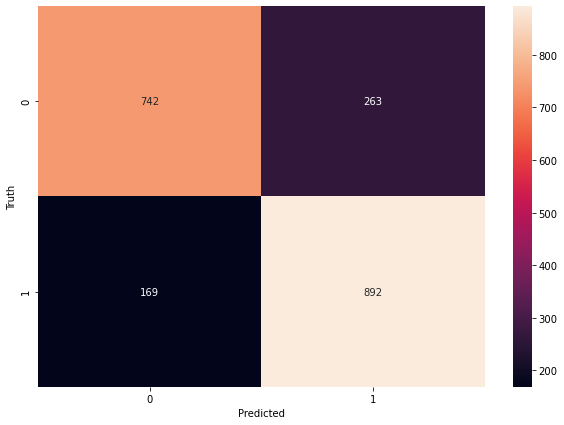

In [154]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [155]:
from sklearn.metrics import accuracy_score
acc =accuracy_score(y_test,y_pred)
print(acc)

0.7909002904162633
